In [30]:
import imageio.v3 as iio
import numpy as np
import skimage.morphology as morph
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.util import random_noise
from tqdm import tqdm

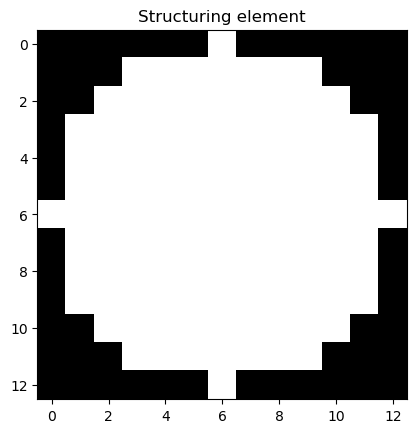

In [31]:
# Open image
img = plt.imread('images/Edges.png')

selem = morph.disk(6)
# selem = morph.diamond(6)
# selem = morph.square(3)
# selem = morph.star(6)
plt.imshow(selem, cmap='gray')
plt.title('Structuring element')
plt.show()

### Question: Operate on a binary image and a greyscale image with the commands imerode and imdilate. What are the effects on binary and grayscale images? Justify. Try with different structuring elements (different shapes, different sizes).

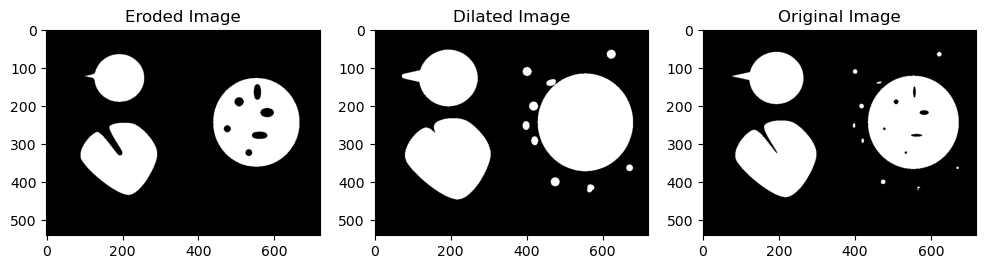

In [32]:
# Perform erosion and dilation
eroded = morph.erosion(img, selem)
dilated = morph.dilation(img, selem)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Eroded Image')
plt.imshow(eroded, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Dilated Image')
plt.imshow(dilated, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.show()

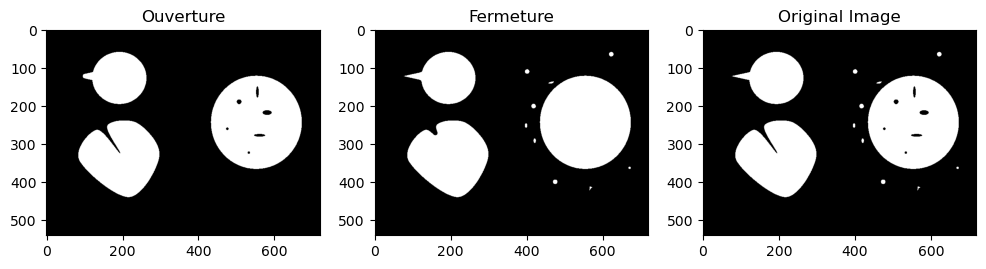

In [33]:
# Opening, closing
opened = morph.opening(img, selem)
closed = morph.closing(img, selem)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Ouverture')
plt.imshow(opened, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Fermeture')
plt.imshow(closed, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.show()

### Question : Define the following operators based on erosion and dilation: internal edges, external edges, morphological gradient

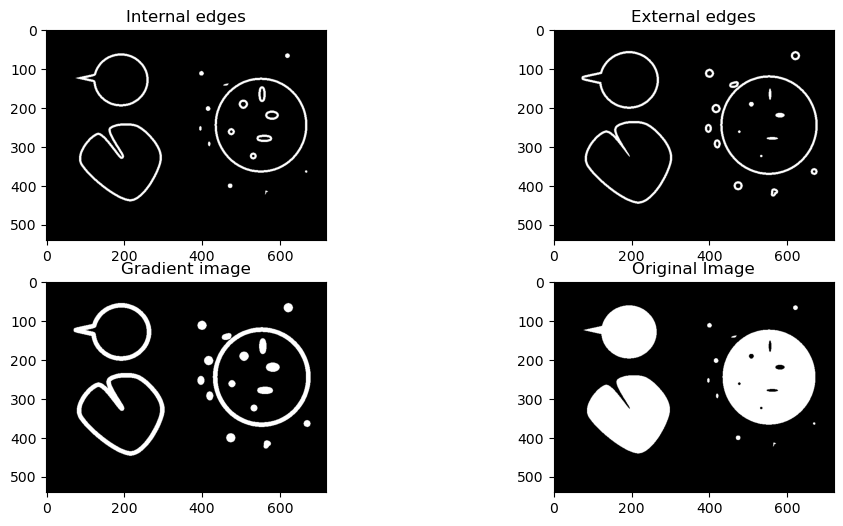

In [34]:
# Internal, external edges and gradient
internal_edges = img - eroded
external_edges = dilated - img
gradient = internal_edges + external_edges

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Internal edges')
plt.imshow(internal_edges, cmap='gray')
plt.subplot(2, 2, 2)
plt.title('External edges')
plt.imshow(external_edges, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('Gradient image')
plt.imshow(gradient, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.show()

### Quesion : Write an algorithm that computes, on the map of Europe, the distance of each pixel w.r.t. the sea.

The idea is to apply a closing on the binary image of europe. Then, we iterate this operation with different sizes of the structuring element. Eventually, we sum the results to get higher values for the pixels in the continent and smaller values for the pixels near the sea.

Computing openings: 100%|██████████| 16/16 [00:31<00:00,  1.97s/it]


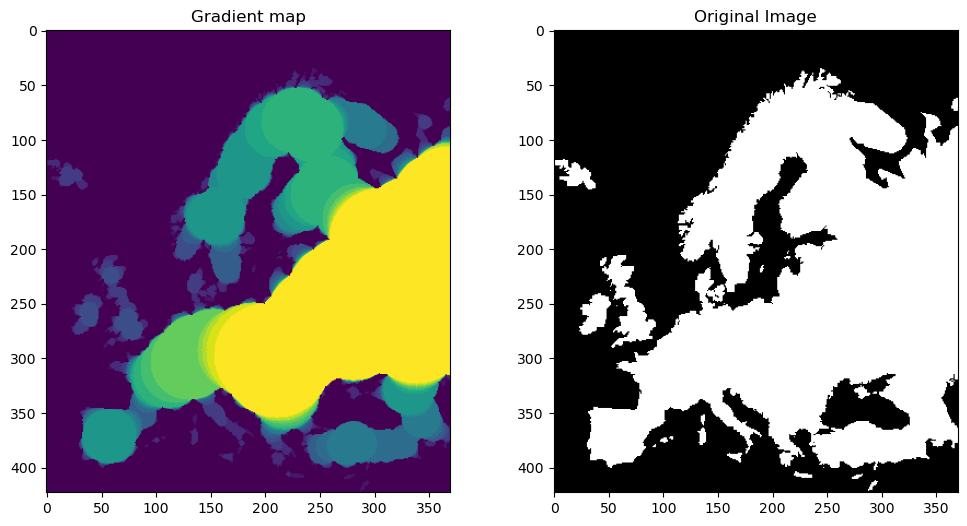

In [35]:
img = plt.imread('images/EuropeBW.png')

gradient_map = img.copy()
for size in tqdm(range(2,50,3), desc="Computing openings"):
    selem = morph.disk(size)
    opened = morph.opening(img, selem)
    gradient_map += opened

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Gradient map')
plt.imshow(gradient_map, cmap='viridis')
plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.show()

### Question : Filter out the lines from next image to count the number of circles.

The lines' width is smaller than the circles radius. So if we select a structural element with a circle shape and a radius stricly higher than the lines' width, we end up with the original circles only.

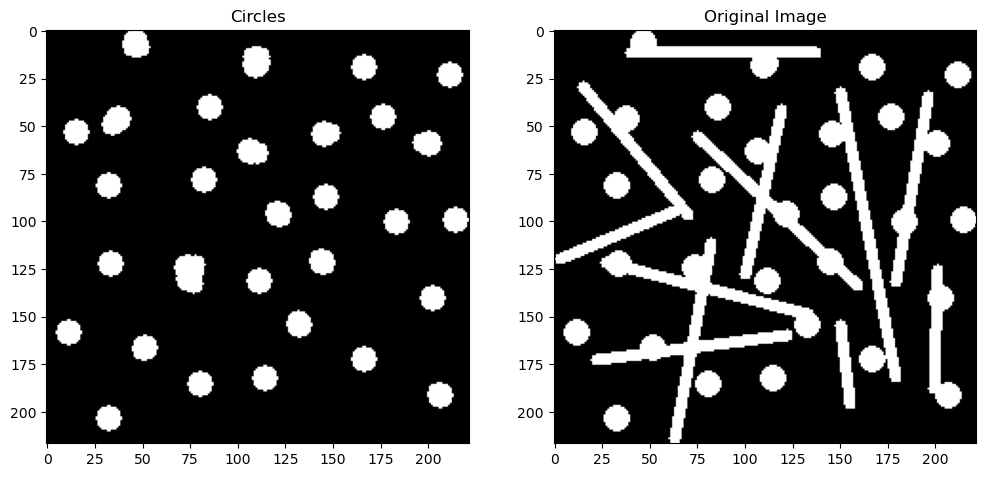

In [36]:
# img = plt.imread('images/linesandcircles.gif')
img_sequence = iio.imread('images/linesandcircles.gif', index=None)
img = rgb2gray(img_sequence[0])

selem = morph.disk(5)
processed_img = morph.opening(img, selem)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Circles')
plt.imshow(processed_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.show()

In [37]:
labels, num_regions = label(processed_img, connectivity=2, return_num=True)
print(f"Nombre de régions non nulles trouvées (8-connexité) : {num_regions}")

Nombre de régions non nulles trouvées (8-connexité) : 30


### Question : Apply a salt-and-pepper noise to the Nebuleuse image.

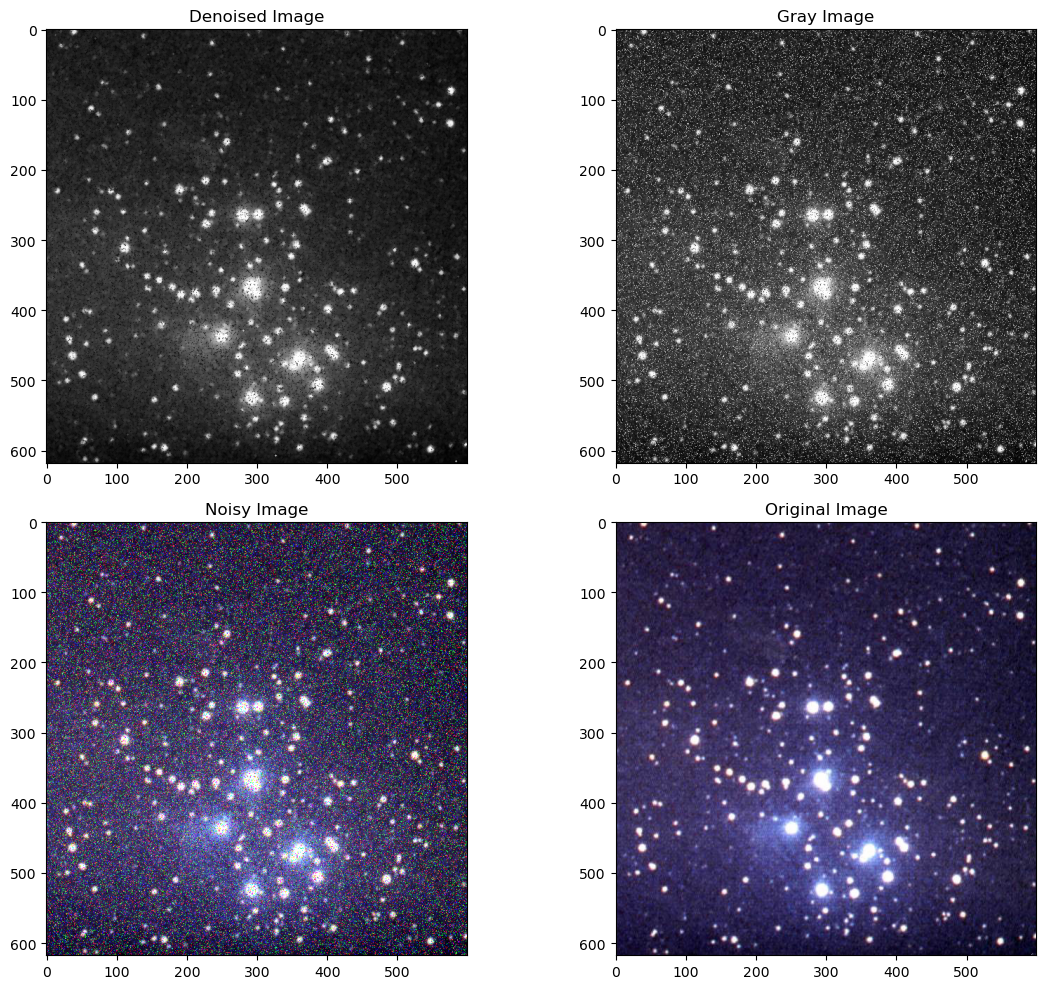

In [38]:
img = plt.imread('images/pleiades.jpg')

noisy_img = random_noise(img, mode='s&p', amount=0.15)

img_gray = rgb2gray(noisy_img)
denoised_img = morph.opening(img_gray, morph.disk(1))

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.title('Denoised Image')
plt.imshow(denoised_img, cmap='gray')
plt.subplot(2, 2, 2)
plt.title('Gray Image')
plt.imshow(img_gray, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('Noisy Image')
plt.imshow(noisy_img)
plt.subplot(2, 2, 4)
plt.title('Original Image')
plt.imshow(img)
plt.tight_layout()
plt.show()